## In this chapter, you'll be introduced to fundamental concepts in network analytics while becoming acquainted with a real-world Twitter network dataset that you will explore throughout the course. In addition, you'll learn about NetworkX, a library that allows you to manipulate, analyze, and model graph data. You'll learn about different types of graphs as well as how to rationally visualize them.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import networkx as nx

In [3]:
T = nx.read_gpickle('ego-twitter.p')

In [4]:
T

In [5]:
#nx.draw(T)

In [6]:
T.size()

33142

In [7]:
#T.nodes()

### Queries on a graph
Now that you know some basic properties of the graph and have practiced using NetworkX's drawing facilities to visualize components of it, it's time to explore how you can query it for nodes and edges. Specifically, you're going to look for "nodes of interest" and "edges of interest". To achieve this, you'll make use of the .nodes() and .edges() methods. The .nodes() method returns a list of nodes, while the .edges() method returns a list of tuples, in which each tuple shows the nodes that are present on that edge. Recall that passing in the keyword argument data=True in these methods retrieves the corresponding metadata associated with the nodes and edges as well.

You'll write list comprehensions to effectively build these queries in one line. For a refresher on list comprehensions, refer to [Part 2](https://www.datacamp.com/courses/python-data-science-toolbox-part-2) of DataCamp's Python Data Science Toolbox course. Here's the recipe for a list comprehension:

[ output expression for iterator variable in iterable if predicate expression ].


__Instructions__
- Use a list comprehension to get a list of nodes from the graph T that have the 'occupation' label of 'scientist'.
    - The output expression n has been specified for you, along with the iterator variables n and d. Your task is to fill in the iterable and the conditional expression.
    - Use the .nodes() method of T access its nodes, and be sure to specify data=True to obtain the metadata for the nodes.
    - The iterator variable d is a dictionary. The key of interest here is 'occupation' and value of interest is 'scientist'.
- Use a list comprehension to get a list of edges from the graph T that were formed for at least 6 years, i.e., from before 1 Jan 2010.
    - Your task once again is to fill in the iterable and conditional expression.
    - Use the .edges() method of T to access its edges. Be sure to obtain the metadata for the edges as well.
    - The dates are stored as datetime.date objects in the metadata dictionary d, under the key 'date'. To access the date 1 Jan 2009, for example, the dictionary value would be date(2009, 1, 1).

### Specifying a weight on edges
Weights can be added to edges in a graph, typically indicating the "strength" of an edge. In NetworkX, the weight is indicated by the 'weight' key in the metadata dictionary.

Before attempting the exercise, use the IPython Shell to access the dictionary metadata of T and explore it, for instance by running the commands T.edges[1, 10] and then T.edges[10, 1]. Note how there's only one field, and now you're going to add another field, called 'weight'

In [8]:
T.edges[1, 10]

{'date': datetime.date(2012, 9, 8)}

In [9]:
#T.edges[10, 1] -> shows error

__Instructions__
- Set the 'weight' attribute of the edge between node 1 and 10 of T to be equal to 2. Refer to the following template to set an attribute of an edge: network_name.edges[node1, node2]['attribute'] = value. Here, the 'attribute' is 'weight'.
- Set the weight of every edge involving node 293 to be equal to 1.1. To do this:
- Using a for loop, iterate over all the edges of T, including the metadata.
    - If 293 is involved in the list of nodes [u, v]:
    - Set the weight of the edge between u and v to be 1.1.

In [10]:
# Set the weight of the edge
T.edges[1, 10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:

        # Set the weight to 1.1
        T.edges[u, v]['weight'] = 1.1

### Checking whether there are self-loops in the graph
As Eric discussed, NetworkX also allows edges that begin and end on the same node; while this would be non-intuitive for a social network graph, it is useful to model data such as trip networks, in which individuals begin at one location and end in another.

It is useful to check for this before proceeding with further analyses, and NetworkX graphs provide a method for this purpose: .number_of_selfloops().

In this exercise as well as later ones, you'll find the assert statement useful. An assert-ions checks whether the statement placed after it evaluates to True, otherwise it will throw an AssertionError.

To begin, use the .number_of_selfloops() method on T in the IPython Shell to get the number of edges that begin and end on the same node. A number of self-loops have been synthetically added to the graph. Your job in this exercise is to write a function that returns these edges.

__Instructions__
- Define a function called find_selfloop_nodes() which takes one argument: G.
    - Using a for loop, iterate over all the edges in G (excluding the metadata).
    - If node u is equal to node v:
        - Append u to the list nodes_in_selfloops.
        - Return the list nodes_in_selfloops.
- Check that the number of self loops in the graph equals the number of nodes in self loops.

In [11]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in T.edges:

    # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

### Visualizing using Matrix plots
It is time to try your first "fancy" graph visualization method: a matrix plot. To do this, nxviz provides a MatrixPlot object.

nxviz is a package for visualizing graphs in a rational fashion. Under the hood, the MatrixPlot utilizes nx.to_numpy_matrix(G), which returns the matrix form of the graph. Here, each node is one column and one row, and an edge between the two nodes is indicated by the value 1. In doing so, however, only the weight metadata is preserved; all other metadata is lost, as you'll verify using an assert statement.

A corresponding nx.from_numpy_matrix(A) allows one to quickly create a graph from a NumPy matrix. The default graph type is Graph(); if you want to make it a DiGraph(), that has to be specified using the create_using keyword argument, e.g. (nx.from_numpy_matrix(A, create_using=nx.DiGraph)).

One final note, matplotlib.pyplot and networkx have already been imported as plt and nx, respectively, and the graph T has been pre-loaded. For simplicity and speed, we have sub-sampled only 100 edges from the network.

In [12]:
sampled_graph = nx.Graph()

In [13]:
import random
k = 100
sampled_nodes = random.sample(T.nodes, k)
sampled_edges = random.sample(T.edges, k)

In [14]:
sampled_graph.add_nodes_from(sampled_nodes)

In [15]:
sampled_graph.add_edges_from(sampled_edges)

In [16]:
#! pip install nxviz

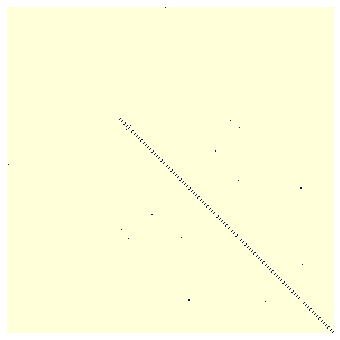

In [17]:
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(sampled_graph)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# Convert T to a matrix format: A
A = nx.to_numpy_matrix(sampled_graph)

# Convert A back to the NetworkX form as a directed graph: T_conv
sampled_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in sampled_conv.nodes(data=True):
    assert 'category' not in d.keys()

### Visualizing using Circos plots
Circos plots are a rational, non-cluttered way of visualizing graph data, in which nodes are ordered around the circumference in some fashion, and the edges are drawn within the circle that results, giving a beautiful as well as informative visualization about the structure of the network.

In this exercise, you'll continue getting practice with the nxviz API, this time with the CircosPlot object. 

In [18]:
sampled_graph.size()

100

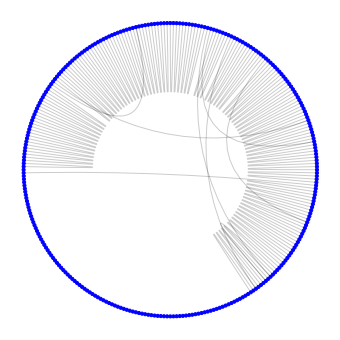

In [19]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(sampled_graph)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()


### Visualizing using Arc plots
Following on what you've learned about the nxviz API, now try making an ArcPlot of the network. Two keyword arguments that you will try here are node_order='keyX' and node_color='keyX', in which you specify a key in the node metadata dictionary to color and order the nodes by.

matplotlib.pyplot has been imported for you as plt.

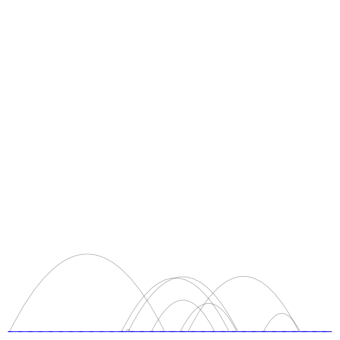

In [20]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(sampled_graph)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Chapter 2 - Important nodes

## Here, you'll learn about ways of identifying nodes that are important in a network. In doing so, you'll be introduced to more advanced concepts in network analysis as well as learn the basics of path-finding algorithms. The chapter concludes with a deep dive into the Twitter network dataset which will reinforce the concepts you've learned, such as degree centrality and betweenness centrality.

### Compute number of neighbors for each node
How do you evaluate whether a node is an important one or not? There are a few ways to do so, and here, you're going to look at one metric: the number of neighbors that a node has.

Every NetworkX graph G exposes a .neighbors(n) method that returns a list of nodes that are the neighbors of the node n. To begin, use this method in the IPython Shell on the Twitter network T to get the neighbors of node 1. This will get you familiar with how the function works. Then, your job in this exercise is to write a function that returns all nodes that have m neighbors.

In [21]:
print(list(T.neighbors(1)))

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


__Instructions__
- Write a function called nodes_with_m_nbrs() that has two parameters - G and m - and returns all nodes that have m neighbors. To do this:
    - Iterate over all nodes in G (not including the metadata).
    - Use the len() and list() functions together with the .neighbors() method to calculate the total number of neighbors that node n in graph G has.
        - If the number of neighbors of node n is equal to m, add n to the set nodes using the .add() method.
    - After iterating over all the nodes in G, return the set nodes.
- Use your nodes_with_m_nbrs() function to retrieve all the nodes that have 6 neighbors in the graph T.


In [22]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T, 6)
print(six_nbrs)

{22533, 1803, 11276, 11279, 6161, 4261, 10149, 3880, 16681, 5420, 14898, 64, 14539, 6862, 20430, 9689, 475, 1374, 6112, 9186, 17762, 14956, 2927, 11764, 4725}


### Compute degree distribution
The number of neighbors that a node has is called its "degree", and it's possible to compute the degree distribution across the entire graph. In this exercise, your job is to compute the degree distribution across T.

__Instructions__
- Use a list comprehension along with the .neighbors(n) method to get the degree of every node. The result should be a list of integers.
    - Use n as your iterator variable.
    - The output expression of your list comprehension should be the number of neighbors that node n has - that is, its degree. Use the len() and list() functions together with the .neighbors() method to compute this.
    - The iterable in your list comprehension is all the nodes in T, accessed using the .nodes() method.
- Print the degrees.

In [23]:
# Compute the degree of every node: degrees
degrees = [len(list(T.neighbors(n))) for n in T.nodes()]

# Print the degrees
print(degrees)

[47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 10, 27, 0, 0, 0, 0, 0, 0, 0, 0, 34, 0, 0, 0, 0, 0, 60, 0, 11, 4, 0, 12, 0, 0, 56, 53, 0, 30, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 6, 0, 0, 0, 0, 0, 33, 0, 0, 0, 0, 39, 8, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 26, 0, 5, 0, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 7, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5

### Degree centrality distribution
The degree of a node is the number of neighbors that it has. The degree centrality is the number of neighbors divided by all possible neighbors that it could have. Depending on whether self-loops are allowed, the set of possible neighbors a node could have could also include the node itself.

The nx.degree_centrality(G) function returns a dictionary, where the keys are the nodes and the values are their degree centrality values.

__Instructions__
- Compute the degree centrality of the Twitter network T.
- Using plt.hist(), plot a histogram of the degree centrality distribution of T. This can be accessed using list(deg_cent.values()).
- Plot a histogram of the degree distribution degrees of T. This is the same list you computed in the last exercise.
- Create a scatter plot with degrees on the x-axis and the degree centrality distribution list(deg_cent.values()) on the y-axis

(array([2.2878e+04, 2.4300e+02, 1.1600e+02, 6.4000e+01, 3.2000e+01,
        1.5000e+01, 1.2000e+01, 5.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([4.27935638e-05, 1.06128038e-03, 2.07976720e-03, 3.09825402e-03,
        4.11674084e-03, 5.13522766e-03, 6.15371448e-03, 7.17220130e-03,
        8.19068812e-03, 9.20917494e-03, 1.02276618e-02]),
 <a list of 10 Patch objects>)

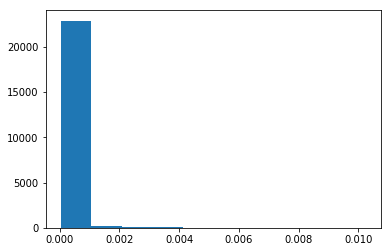

In [24]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

# Plot a histogram of the degree centrality distribution of the graph.
plt.hist(list(deg_cent.values()))

(array([2.2888e+04, 2.4600e+02, 1.1100e+02, 6.0000e+01, 2.9000e+01,
        1.5000e+01, 1.1000e+01, 5.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([  0. ,  23.8,  47.6,  71.4,  95.2, 119. , 142.8, 166.6, 190.4,
        214.2, 238. ]),
 <a list of 10 Patch objects>)

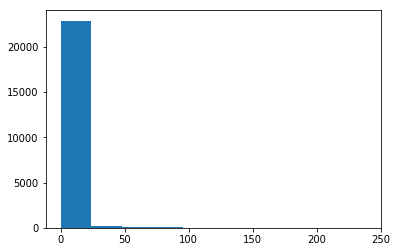

In [25]:
# Plot a histogram of the degree distribution of the graph
plt.hist(degrees)

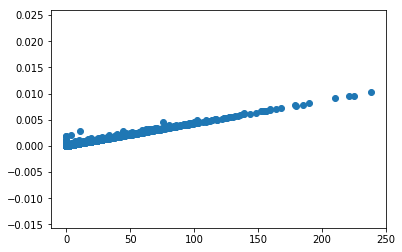

In [26]:
# Plot a scatter plot of the centrality distribution and the degree distribution
plt.scatter(degrees, list(deg_cent.values()))

### Shortest Path I
You can leverage what you know about finding neighbors to try finding paths in a network. One algorithm for path-finding between two nodes is the "breadth-first search" (BFS) algorithm. In a BFS algorithm, you start from a particular node and iteratively search through its neighbors and neighbors' neighbors until you find the destination node.

Pathfinding algorithms are important because they provide another way of assessing node importance; you'll see this in a later exercise.

In this set of 3 exercises, you're going to build up slowly to get to the final BFS algorithm. The problem has been broken into 3 parts that, if you complete in succession, will get you to a first pass implementation of the BFS algorithm.

__Instructions__
- Create a function called path_exists() that has 3 parameters - G, node1, and node2 - and returns whether or not a path exists between the two nodes.
- Initialize the queue of cells to visit with the first node, node1. queue should be a list.
- Iterate over the nodes in queue.
- Get the neighbors of the node using the .neighbors() method of the graph G.
- Check to see if the destination node node2 is in the set of neighbors. If it is, return True.

In [27]:
# Define path_exists()
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()

    # Initialize the queue of cells to visit with the first node: queue
    queue = [node1]

    # Iterate over the nodes in the queue
    for node in queue:

        # Get neighbors of the node
        neighbors = G.neighbors(node)

        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break


### Shortest Path II
Now that you've got the code for checking whether the destination node is present in neighbors, next up, you're going to extend the same function to write the code for the condition where the destination node is not present in the neighbors.

All the code you need to write is in the else condition; that is, if node2 is not in neighbors

__Instructions__
- Using the .add() method, add the current node node to the set visited_nodes to keep track of what nodes have already been visited.
- Add the neighbors of the current node node that have not yet been visited to queue. To do this, you'll need to use the .extend() method of queue together with a list comprehension. The .extend() method appends all the items in a given list.
    - The output expression and iterator variable of the list comprehension are both n. The iterable is the list neighbors, and the conditional is if n is not in the visited nodes

In [28]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
        else:
            # Add current node to visited nodes
            visited_nodes.add(node)

            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])

### Shortest Path III
This is the final exercise of this trio! You're now going to complete the problem by writing the code that returns False if there's no path between two nodes.

In [29]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

### NetworkX betweenness centrality on a social network
Betweenness centrality is a node importance metric that uses information about the shortest paths in a network. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.

NetworkX provides the nx.betweenness_centrality(G) function for computing the betweenness centrality of every node in a graph, and it returns a dictionary where the keys are the nodes and the values are their betweenness centrality measures.  

A sub-sampled version of the Twitter network has been loaded as T_sub

In [47]:
T_sub = nx.Graph()

In [48]:
T_sub_nodes = list(T.nodes())[0:50]

In [50]:
T_sub_edges = list(T.edges())[0:120]

In [51]:
T_sub.add_nodes_from(T_sub_nodes)
T_sub.add_edges_from(T_sub_edges)

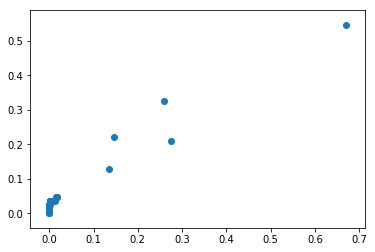

In [55]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(T_sub)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(T_sub)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

### Deep dive - Twitter network
You're going to now take a deep dive into a Twitter network, which will help reinforce what you've learned earlier. First, you're going to find the nodes that can broadcast messages very efficiently to lots of people one degree of separation away.

__Instruction__
- Write a function find_nodes_with_highest_deg_cent(G) that returns the node(s) with the highest degree centrality using the following steps:
    - Compute the degree centrality of G.
    - Compute the maximum degree centrality using the max() function on list(deg_cent.values()).
    - Iterate over the degree centrality dictionary, deg_cent.items().
    - If the degree centrality value v of the current node k is equal to max_dc, add it to the set of nodes.
- Use your function to find the node(s) that has the highest degree centrality in T.
- Write an assertion statement that checks that the node(s) is/are correctly identified

In [56]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = (nx.degree_centrality(G))

    # Compute the maximum degree centrality: max_dc
    max_dc = max(list((deg_cent.values())))

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())

{11824}


### Deep dive - Twitter network part II
Next, you're going to do an analogous deep dive on betweenness centrality! Just a few hints to help you along: remember that betweenness centrality is computed using nx.betweenness_centrality(G).  
A sub-sampled version of the Twitter network has been loaded as T_sub

__Instructions__
- Write a function find_node_with_highest_bet_cent(G) that returns the node(s) with the highest betweenness centrality.
    - Compute the betweenness centrality of G.
    - Compute the maximum betweenness centrality using the max() function on list(bet_cent.values()).
    - Iterate over the degree centrality dictionary, bet_cent.items().
    - If the degree centrality value v of the current node k is equal to max_bc, add it to the set of nodes.
- Use your function to find the node(s) that has the highest betweenness centrality in T_sub.
- Write an assertion statement that you've got the right node. 

In [57]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)

    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))

    nodes = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(T_sub)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(T_sub)[node] == max(nx.betweenness_centrality(T_sub).values())

---

# Chapter 3 - Structures

## This chapter is all about finding interesting structures within network data. You'll learn about essential concepts such as cliques, communities, and subgraphs, which will leverage all of the skills you acquired in Chapter 2. By the end of this chapter, you'll be ready to apply the concepts you've learned to a real-world case study.



### Identifying triangle relationships
Now that you've learned about cliques, it's time to try leveraging what you know to find structures in a network. Triangles are what you'll go for first. We may be interested in triangles because they're the simplest complex clique. Let's write a few functions; these exercises will bring you through the fundamental logic behind network algorithms.

In the Twitter network, each node has an 'occupation' label associated with it, in which the Twitter user's work occupation is divided into celebrity, politician and scientist. One potential application of triangle-finding algorithms is to find out whether users that have similar occupations are more likely to be in a clique with one another

__Instructions__
- Import combinations from itertools.
- Write a function is_in_triangle() that has two parameters - G and n - and checks whether a given node is in a triangle relationship or not.
    - combinations(iterable, n) returns combinations of size n from iterable. This will be useful here, as you want combinations of size 2 from G.neighbors(n).
    - To check whether an edge exists between two nodes, use the .has_edge(node1, node2) method. If an edge exists, then the given node is in a triangle relationship, and you should return True.


In [58]:
from itertools import combinations

# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

### Finding nodes involved in triangles
NetworkX provides an API for counting the number of triangles that every node is involved in: nx.triangles(G). It returns a dictionary of nodes as the keys and number of triangles as the values. Your job in this exercise is to modify the function defined earlier to extract all of the nodes involved in a triangle relationship with a given node.

__Instructions__
- Write a function nodes_in_triangle() that has two parameters - G and n - and identifies all nodes in a triangle relationship with a given node.
    - In the for loop, iterate over all possible triangle relationship combinations.
    - Check whether the nodes n1 and n2 have an edge between them. If they do, add both nodes to the set triangle_nodes.
- Use your function in an assert statement to check that the number of nodes involved in a triangle relationship with node 1 of graph T is equal to 35.


In [64]:
from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

# Write the assertion statement
assert len(nodes_in_triangle(T, 1))

---

# Chapter 4 - Bringing it all together


## In this final chapter of the course, you'll consolidate everything you've learned by diving into an in-depth case study of GitHub collaborator network data. This is a great example of real-world social network data, and your newly acquired skills will be fully tested. By the end of this chapter, you'll have developed your very own recommendation system which suggests GitHub users who should collaborate together. Enjoy!



In [82]:
G = nx.read_gpickle('github_users.p')

### Characterizing the network (I)
To start out, let's do some basic characterization of the network, by looking at the number of nodes and number of edges in a network.  
Your job in this exercise is to identify how many nodes and edges are present in the network. You can use the functions len(G.nodes()) and len(G.edges()) to calculate the number of nodes and edges respectively.

In [83]:
len(G.nodes())

56519

In [84]:
len(G.edges())

72900

### Characterizing the network (II)
Let's continue recalling what you've learned before about node importances, by plotting the degree distribution of a network. This is the distribution of node degrees computed across all nodes in a network.

(array([5.5187e+04, 7.5500e+02, 2.2600e+02, 1.4400e+02, 2.1000e+01,
        1.5000e+02, 2.6000e+01, 6.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([0.        , 0.00057681, 0.00115361, 0.00173042, 0.00230723,
        0.00288404, 0.00346084, 0.00403765, 0.00461446, 0.00519127,
        0.00576807]),
 <a list of 10 Patch objects>)

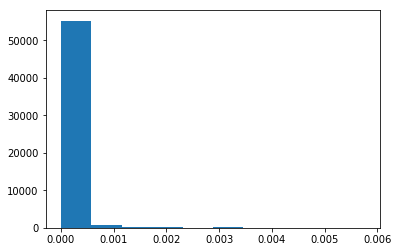

In [85]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))

### Characterizing the network (III)
The last exercise was on degree centrality; this time round, let's recall betweenness centrality!
A sub-sampled version of the Twitter network has been loaded as G_sub

In [86]:
G_sub_nodes = ('u41', 'u69', 'u96', 'u156', 'u297', 'u298', 'u315', 'u322', 'u435', 'u440', 'u640', 'u655', 'u698', 'u821', 'u863', 'u901', 'u914', 'u1254', 'u1407', 'u1468', 'u1908', 'u2022', 'u2066', 'u2137', 'u2289', 'u2482', 'u2552', 'u2643', 'u2737', 'u2906', 'u3083', 'u3174', 'u3231', 'u3243', 'u3271', 'u3658', 'u3974', 'u3979', 'u4159', 'u4199', 'u4329', 'u4412', 'u4513', 'u4710', 'u4761', 'u4953', 'u5082', 'u5337', 'u5693', 'u5993', 'u6081', 'u7418', 'u7623', 'u7963', 'u8135', 'u9866', 'u9869', 'u9997', 'u10090', 'u10340', 'u10500', 'u10603', 'u14964')

In [87]:
G_sub = nx.Graph()

In [88]:
G_sub.add_nodes_from(G_sub_nodes)

In [89]:
G_sub_edges = ('u41', 'u2022'), ('u41', 'u69'), ('u41', 'u5082'), ('u41', 'u298'), ('u41', 'u901'), ('u69', 'u315'), ('u69', 'u4513'), ('u69', 'u5082'), ('u69', 'u901'), ('u69', 'u298'), ('u69', 'u2022'), ('u96', 'u315'), ('u96', 'u2482'), ('u96', 'u10500'), ('u96', 'u2022'), ('u96', 'u863'), ('u96', 'u9997'), ('u96', 'u297'), ('u96', 'u698'), ('u96', 'u2066'), ('u96', 'u7963'), ('u96', 'u156'), ('u96', 'u2906'), ('u96', 'u2552'), ('u156', 'u315'), ('u156', 'u2482'), ('u156', 'u10500'), ('u156', 'u863'), ('u156', 'u2022'), ('u156', 'u297'), ('u156', 'u9997'), ('u156', 'u698'), ('u156', 'u2066'), ('u156', 'u7963'), ('u156', 'u2906'), ('u156', 'u2552'), ('u297', 'u315'), ('u297', 'u2482'), ('u297', 'u863'), ('u297', 'u2022'), ('u297', 'u9997'), ('u297', 'u698'), ('u297', 'u10500'), ('u297', 'u2066'), ('u297', 'u7963'), ('u297', 'u2906'), ('u297', 'u2552'), ('u298', 'u5082'), ('u298', 'u901'), ('u298', 'u2022'), ('u315', 'u2482'), ('u315', 'u10500'), ('u315', 'u2022'), ('u315', 'u863'), ('u315', 'u9997'), ('u315', 'u698'), ('u315', 'u2066'), ('u315', 'u7963'), ('u315', 'u2906'), ('u315', 'u4513'), ('u315', 'u2552'), ('u322', 'u3174'), ('u322', 'u3974'), ('u322', 'u7623'), ('u322', 'u8135'), ('u322', 'u2022'), ('u322', 'u4953'), ('u322', 'u640'), ('u322', 'u4412'), ('u322', 'u10340'), ('u322', 'u4159'), ('u322', 'u1908'), ('u322', 'u3979'), ('u322', 'u435'), ('u322', 'u821'), ('u322', 'u9869'), ('u322', 'u9866'), ('u322', 'u10603'), ('u322', 'u3083'), ('u322', 'u4710'), ('u435', 'u7623'), ('u435', 'u8135'), ('u435', 'u2022'), ('u435', 'u10603'), ('u435', 'u10340'), ('u435', 'u9866'), ('u440', 'u5693'), ('u440', 'u2643'), ('u440', 'u10090'), ('u440', 'u3271'), ('u640', 'u1908'), ('u640', 'u3174'), ('u640', 'u3979'), ('u640', 'u3974'), ('u640', 'u821'), ('u640', 'u4953'), ('u640', 'u4412'), ('u640', 'u9869'), ('u640', 'u4159'), ('u640', 'u4710'), ('u640', 'u3083'), ('u655', 'u2643'), ('u655', 'u2906'), ('u655', 'u2137'), ('u655', 'u914'), ('u655', 'u4513'), ('u698', 'u10500'), ('u698', 'u2066'), ('u698', 'u2906'), ('u698', 'u2552'), ('u698', 'u9997'), ('u698', 'u7963'), ('u698', 'u2482'), ('u698', 'u863'), ('u698', 'u2022'), ('u821', 'u3174'), ('u821', 'u3974'), ('u821', 'u4953'), ('u821', 'u4412'), ('u821', 'u4159'), ('u821', 'u1908'), ('u821', 'u3979'), ('u821', 'u9869'), ('u821', 'u4710'), ('u821', 'u3083'), ('u863', 'u10500'), ('u863', 'u2022'), ('u863', 'u7963'), ('u863', 'u2906'), ('u863', 'u2482'), ('u863', 'u9997'), ('u863', 'u2552'), ('u863', 'u2066'), ('u901', 'u2022'), ('u901', 'u5082'), ('u914', 'u2022'), ('u914', 'u3231'), ('u1254', 'u2737'), ('u1254', 'u2289'), ('u1254', 'u2643'), ('u1254', 'u4329'), ('u1254', 'u4761'), ('u1407', 'u2643'), ('u1407', 'u6081'), ('u1407', 'u3658'), ('u1468', 'u5993'), ('u1468', 'u2643'), ('u1468', 'u2022'), ('u1468', 'u7418'), ('u1468', 'u5337'), ('u1468', 'u9869'), ('u1908', 'u3174'), ('u1908', 'u3979'), ('u1908', 'u3974'), ('u1908', 'u4953'), ('u1908', 'u4412'), ('u1908', 'u9869'), ('u1908', 'u4159'), ('u1908', 'u4710'), ('u1908', 'u3083'), ('u2022', 'u2482'), ('u2022', 'u5993'), ('u2022', 'u7623'), ('u2022', 'u8135'), ('u2022', 'u10500'), ('u2022', 'u10340'), ('u2022', 'u9997'), ('u2022', 'u3231'), ('u2022', 'u2643'), ('u2022', 'u2906'), ('u2022', 'u5082'), ('u2022', 'u4199'), ('u2022', 'u9869'), ('u2022', 'u2066'), ('u2022', 'u9866'), ('u2022', 'u7418'), ('u2022', 'u7963'), ('u2022', 'u5337'), ('u2022', 'u10603'), ('u2022', 'u2552'), ('u2066', 'u10500'), ('u2066', 'u7963'), ('u2066', 'u2906'), ('u2066', 'u2482'), ('u2066', 'u9997'), ('u2066', 'u2552'), ('u2137', 'u2643'), ('u2137', 'u4513'), ('u2289', 'u4329'), ('u2289', 'u4761'), ('u2289', 'u2643'), ('u2289', 'u2737'), ('u2482', 'u10500'), ('u2482', 'u7963'), ('u2482', 'u2906'), ('u2482', 'u9997'), ('u2482', 'u2552'), ('u2552', 'u10500'), ('u2552', 'u9997'), ('u2552', 'u2906'), ('u2552', 'u7963'), ('u2643', 'u10090'), ('u2643', 'u5993'), ('u2643', 'u5693'), ('u2643', 'u4329'), ('u2643', 'u4761'), ('u2643', 'u9869'), ('u2643', 'u6081'), ('u2643', 'u2737'), ('u2643', 'u3658'), ('u2643', 'u3243'), ('u2643', 'u7418'), ('u2643', 'u5337'), ('u2643', 'u4513'), ('u2643', 'u3271'), ('u2737', 'u4329'), ('u2737', 'u4761'), ('u2906', 'u10500'), ('u2906', 'u9997'), ('u2906', 'u7963'), ('u3083', 'u3174'), ('u3083', 'u3974'), ('u3083', 'u4953'), ('u3083', 'u4412'), ('u3083', 'u4159'), ('u3083', 'u3979'), ('u3083', 'u9869'), ('u3083', 'u4710'), ('u3174', 'u3974'), ('u3174', 'u4953'), ('u3174', 'u4412'), ('u3174', 'u4159'), ('u3174', 'u3979'), ('u3174', 'u9869'), ('u3174', 'u4710'), ('u3231', 'u4159'), ('u3243', 'u3271'), ('u3271', 'u10090'), ('u3271', 'u5693'), ('u3658', 'u6081'), ('u3974', 'u4953'), ('u3974', 'u4412'), ('u3974', 'u4159'), ('u3974', 'u3979'), ('u3974', 'u9869'), ('u3974', 'u4710'), ('u3979', 'u4953'), ('u3979', 'u4412'), ('u3979', 'u4159'), ('u3979', 'u9869'), ('u3979', 'u4710'), ('u4159', 'u4412'), ('u4159', 'u9869'), ('u4159', 'u4710'), ('u4159', 'u4953'), ('u4329', 'u4761'), ('u4412', 'u4953'), ('u4412', 'u9869'), ('u4412', 'u4710'), ('u4710', 'u4953'), ('u4710', 'u9869'), ('u4953', 'u9869'), ('u5337', 'u5993'), ('u5337', 'u7418'), ('u5337', 'u9869'), ('u5693', 'u10090'), ('u5993', 'u7418'), ('u5993', 'u9869'), ('u7418', 'u9869'), ('u7623', 'u8135'), ('u7623', 'u10603'), ('u7623', 'u10340'), ('u7623', 'u9866'), ('u7963', 'u10500'), ('u7963', 'u9997'), ('u8135', 'u10603'), ('u8135', 'u10340'), ('u8135', 'u9866'), ('u9866', 'u10603'), ('u9866', 'u10340'), ('u9997', 'u10500'), ('u10340', 'u10603')

In [90]:
G_sub.add_edges_from(G_sub_edges)

(array([59.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([0.        , 0.05272783, 0.10545567, 0.1581835 , 0.21091133,
        0.26363917, 0.316367  , 0.36909484, 0.42182267, 0.4745505 ,
        0.52727834]),
 <a list of 10 Patch objects>)

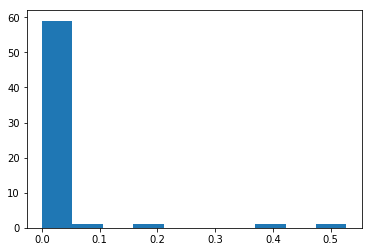

In [91]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G_sub).values()))

### MatrixPlot
Let's now practice making some visualizations. The first one will be the MatrixPlot. In a MatrixPlot, the matrix is the representation of the edges.

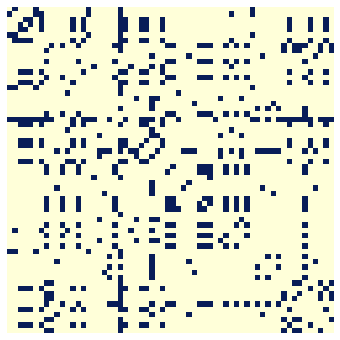

In [99]:
# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G_sub), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(graph=largest_ccs)

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

### ArcPlot
Next up, let's use the ArcPlot to visualize the network. You're going to practice sorting the nodes in the graph as well.

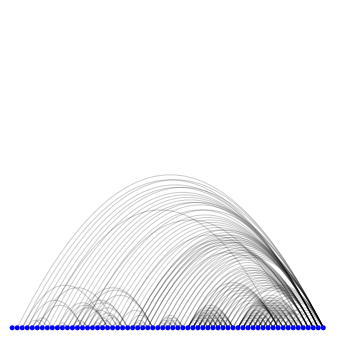

In [103]:
# Iterate over all the nodes in G_sub, including the metadata
for n, d in G_sub.nodes(data=True):

    # Calculate the degree of each node: G_sub.node[n]['degree']
    G_sub.node[n]['degree'] = nx.degree(G_sub, n)

# Create the ArcPlot object: a
a = ArcPlot(graph=G_sub, node_order='degree')

# Draw the ArcPlot to the screen
a.draw()

### CircosPlot
Finally, you're going to make a CircosPlot of the network!

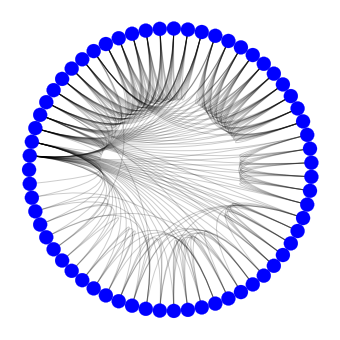

In [114]:
# Iterate over all the nodes, including the metadata
for n, d in G_sub.nodes(data=True):

    # Calculate the degree of each node: G_sub.node[n]['degree']
    G_sub.node[n]['degree'] = nx.degree(G_sub, n)

# Create the CircosPlot object: c
c = CircosPlot(G_sub, node_order='degree')

# Draw the CircosPlot object to the screen
c.draw()

### Fantastic! This CircosPlot provides a compact alternative to the ArcPlot. It is easy to see in this plot that most users belong to one group.

In [115]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G_sub)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

19


### Finding cliques (II)
Great work! Let's continue by finding a particular maximal clique, and then plotting that clique.

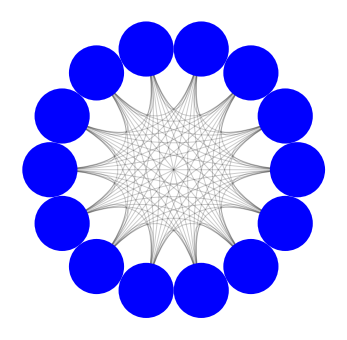

In [116]:
# Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G_sub), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_sub_lc
G_sub_lc = G_sub.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_sub_lc)

# Draw the CircosPlot to the screen
c.draw()

### Finding important collaborators
Almost there! You'll now look at important nodes once more. Here, you'll make use of the degree_centrality() and betweenness_centrality() functions in NetworkX to compute each of the respective centrality scores, and then use that information to find the "important nodes". In other words, your job in this exercise is to find the user(s) that have collaborated with the most number of users.

In [118]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

['u741']


### Characterizing editing communities
You're now going to combine what you've learned about the BFS algorithm and concept of maximal cliques to visualize the network with an ArcPlot.

The largest maximal clique in the Github user collaboration network has been assigned to the subgraph G_lmc. Note that for NetworkX version 2.x and later, G.subgraph(nodelist) returns only an immutable view on the original graph. We must explicitly ask for a .copy() of the graph to obtain a mutatable version.

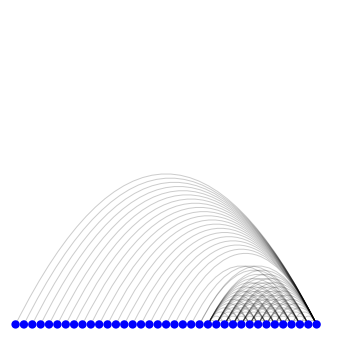

In [119]:
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G_sub), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_sub_lmc
G_sub_lmc = G_sub.subgraph(largest_max_clique).copy()

# G_subo out 1 degree of separation
for node in list(G_sub_lmc.nodes()):
    G_sub_lmc.add_nodes_from(G_sub.neighbors(node))
    G_sub_lmc.add_edges_from(zip([node]*len(list(G_sub.neighbors(node))), G_sub.neighbors(node)))

# Record each node's degree centrality score
for n in G_sub_lmc.nodes():
    G_sub_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_sub_lmc)[n]

# Create the ArcPlot object: a
a = ArcPlot(G_sub_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()

### Recommending co-editors who have yet to edit together
Finally, you're going to leverage the concept of open triangles to recommend users on GitHub to collaborate!

In [121]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):

            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


[('u264', 'u655'), ('u627', 'u3082'), ('u363', 'u1208'), ('u89', 'u325'), ('u741', 'u935'), ('u268', 'u741')]


#### Fantastic job! You've identified pairs of users who should collaborate together, and in doing so, built your very own recommendation system!